http://ianlondon.github.io/blog/how-to-sift-opencv/
https://gilscvblog.com/2013/08/18/a-short-introduction-to-descriptors/

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

print 'OpenCV Version (should be 3.1.0, with nonfree packages installed, for this tutorial):'
print cv2.__version__

# I cropped out each stereo image into its own file.
# You'll have to download the images to run this for yourself
octo_front = cv2.imread('images/Octopus_Far_Front.jpg')
octo_offset = cv2.imread('images/Octopus_Far_Offset.jpg')

def show_rgb_img(img):
    """Convenience function to display a typical color image"""
    return plt.imshow(cv2.cvtColor(img, cv2.CV_32S))

OpenCV Version (should be 3.1.0, with nonfree packages installed, for this tutorial):
3.1.0-dev


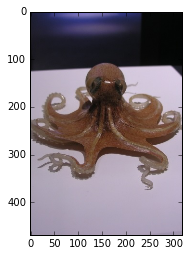

In [2]:
show_rgb_img(octo_front);

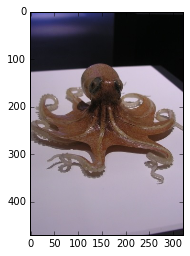

In [4]:
show_rgb_img(octo_offset);

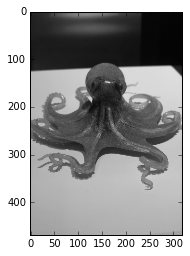

In [5]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

octo_front_gray = to_gray(octo_front)
octo_offset_gray = to_gray(octo_offset)

plt.imshow(octo_front_gray, cmap='gray');

Here are what our SIFT features look like for the front-view octopus image:


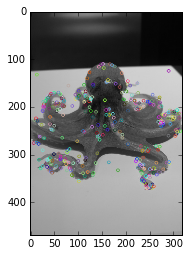

In [6]:
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

# generate SIFT keypoints and descriptors
octo_front_kp, octo_front_desc = gen_sift_features(octo_front_gray)
octo_offset_kp, octo_offset_desc = gen_sift_features(octo_offset_gray)

print 'Here are what our SIFT features look like for the front-view octopus image:'
show_sift_features(octo_front_gray, octo_front, octo_front_kp);

We can also visualize how the SIFT features match up each other across the two images.

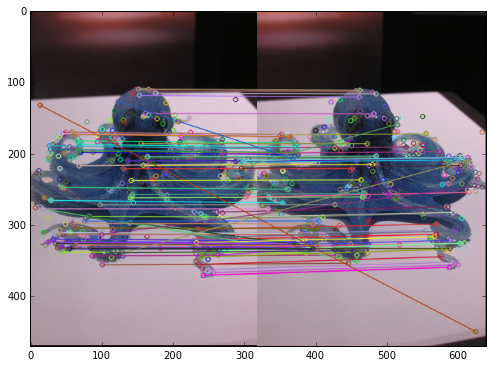

In [7]:
# create a BFMatcher object which will match up the SIFT features
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(octo_front_desc, octo_offset_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    octo_front, octo_front_kp,
    octo_offset, octo_offset_kp,
    matches[:N_MATCHES], octo_offset.copy(), flags=0)

plt.figure(figsize=(12,6))
plt.imshow(match_img);

In [9]:
print len(octo_front_kp), 'keypoints in the list'
print octo_front_kp[0]

345 keypoints in the list
<KeyPoint 00000000076EEED0>


In [10]:
def explain_keypoint(kp):
    print 'angle\n', kp.angle
    print '\nclass_id\n', kp.class_id
    print '\noctave (image scale where feature is strongest)\n', kp.octave
    print '\npt (x,y)\n', kp.pt
    print '\nresponse (the response by which the most strong keypoints have been selected. Can be used for the further sorting or subsampling)\n', kp.response
    print '\nsize (diameter of the meaningful keypoint neighborhood)\n', kp.size

print 'this is an example of a single SIFT keypoint:\n* * *'
explain_keypoint(octo_front_kp[0])

this is an example of a single SIFT keypoint:
* * *
angle
82.0567016602

class_id
-1

octave (image scale where feature is strongest)
787199

pt (x,y)
(151.61952209472656, 110.16256713867188)

response
0.0273116417229

size
2.2873032093


http://docs.opencv.org/master/d2/d29/classcv_1_1KeyPoint.html#aea339bc868102430087b659cd0709c11

In [11]:
print 'SIFT descriptors are vectors of shape', octo_front_desc[0].shape
print 'they look like this:'
octo_front_desc[0]

SIFT descriptors are vectors of shape (128L,)
they look like this:


array([  39.,    0.,    0.,    0.,    0.,    0.,    0.,    8.,  183.,
          0.,    0.,    0.,    0.,    0.,    0.,   87.,  153.,    1.,
          1.,   10.,    4.,    0.,    0.,   48.,    1.,    0.,    1.,
         34.,   12.,    2.,    0.,    1.,   79.,    1.,    0.,    0.,
          0.,    1.,    1.,   10.,  183.,   10.,    0.,    0.,    0.,
          0.,    0.,   81.,  130.,    7.,    2.,   17.,   30.,    6.,
          2.,   42.,    1.,    3.,    2.,   18.,   26.,    2.,    1.,
          1.,   78.,    7.,    0.,    0.,    0.,    0.,    0.,    2.,
        183.,   84.,    1.,    0.,    0.,    0.,    0.,    6.,  117.,
         44.,    8.,   28.,   14.,    5.,    1.,    3.,    0.,    0.,
          1.,   13.,   14.,    6.,    3.,    2.,   38.,    9.,    0.,
          0.,    0.,    0.,    0.,    0.,  183.,   83.,    0.,    0.,
          0.,    0.,    0.,    0.,  132.,   42.,    0.,    1.,    3.,
          4.,    2.,    1.,    0.,    0.,    0.,    3.,   12.,   10.,
          7.,    1.]

<Container object of 128 artists>

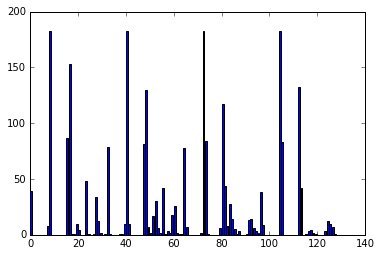

In [19]:
plt.bar(range(0,128),octo_front_desc[0])

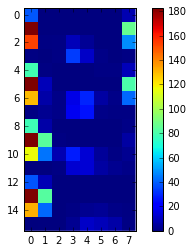

In [13]:
#visualized another way:
plt.imshow(octo_front_desc[0].reshape(16,8), interpolation='none');
plt.colorbar()

Show individual keyppoint:


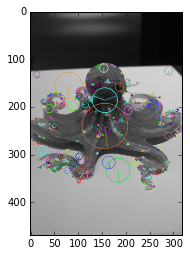

In [54]:
def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy(),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

print 'Show individual keyppoint:'
kps = octo_front_kp[0:10]
kps = sorted(octo_front_kp,key=lambda kp: kp.response, reverse=True)
#kps = kps[0:10]
#kps = kps[0:10]
show_sift_features(octo_front_gray, octo_front, kps)

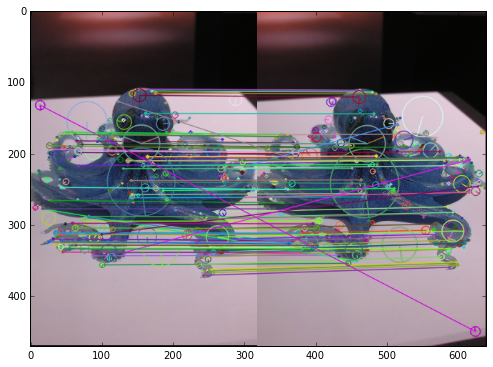

In [55]:
# create a BFMatcher object which will match up the SIFT features
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(octo_front_desc, octo_offset_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    octo_front, octo_front_kp,
    octo_offset, octo_offset_kp,
    matches[:N_MATCHES], octo_offset.copy(), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12,6))
plt.imshow(match_img);

http://docs.opencv.org/3.1.0/da/df5/tutorial_py_sift_intro.html

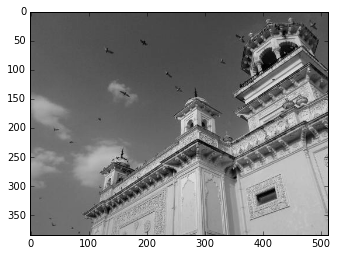

In [49]:
import cv2
import numpy as np
img = cv2.imread('images/home.jpg')
#gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = to_gray(img)
plt.imshow(gray, cmap='gray')

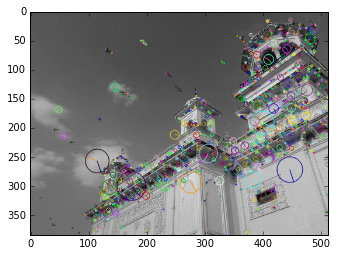

In [53]:
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

img_kps=cv2.drawKeypoints(gray,kp,gray.copy(), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_kps, cmap='gray')